# Linear Regression Implementation from Scratch

In [2]:
!pip install mxnet

Traceback (most recent call last):
  File "/home/iserina/.local/bin/pip", line 7, in <module>
    from pip._internal import main
ModuleNotFoundError: No module named 'pip._internal'


In [3]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

## Generating Data Sets

- Randomly generate $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$
- Use ground truth: weight $\mathbf{w} = [2, -3.4]^\top$ and bias $b = 4.2$
- Generate label by $\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$
  with noise $\epsilon$ obeying a normal distribution with a mean of 0 and a standard deviation of 0.01. 

In [4]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

## Visualize the Second Feature and Label

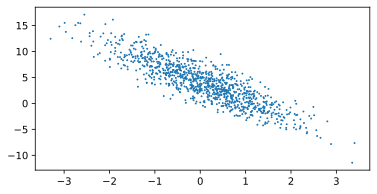

In [5]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(6, 3))
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

## Reading Data

Iterate over the data set and return `batch_size` (batch size) random examples every time.

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices

## Print a Small Data Batch

In [7]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 1.6947968e+00 -2.8610373e-01]
 [-4.1334660e-04  1.3946280e+00]
 [ 8.6821365e-01  1.3929764e+00]
 [ 1.0955427e+00  7.6852047e-01]
 [-2.6133823e-01 -1.6670904e+00]
 [ 4.3465078e-01  2.6999220e-02]
 [ 6.6866076e-01 -1.2908651e+00]
 [-3.0573937e-01 -9.5906508e-01]
 [ 4.5436549e-01 -1.9707150e+00]
 [ 1.3358644e+00  1.1060351e+00]]
<NDArray 10x2 @cpu(0)> 
[ 8.553605  -0.5529463  1.1803566  3.7752948  9.340379   4.966181
  9.928559   6.8569913 11.798886   3.1153047]
<NDArray 10 @cpu(0)>


### Initialize Model Parameters

Weights are initialized to normal random numbers using a mean of 0 and a standard deviation of 0.01, with the bias $b$ set to zero.

In [8]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

### Attach Gradients to Parameters

In [9]:
w.attach_grad()
b.attach_grad()

### Define the Linear Model

In [10]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

### Define the Loss Function

In [11]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### Define the Optimization Algorithm

In [12]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

### Training

In [19]:
lr = 0.1  # Learning rate
num_epochs = 10  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000051
epoch 2, loss 0.000050
epoch 3, loss 0.000051
epoch 4, loss 0.000050
epoch 5, loss 0.000051
epoch 6, loss 0.000050
epoch 7, loss 0.000051
epoch 8, loss 0.000050
epoch 9, loss 0.000050
epoch 10, loss 0.000051


## Evaluate the Trained Model

In [14]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w)
print(b)

Error in estimating w 
[-1.5974045e-05  5.3048134e-04]
<NDArray 2 @cpu(0)>
Error in estimating b 
[-0.00060368]
<NDArray 1 @cpu(0)>

[[ 2.000016 ]
 [-3.4005306]]
<NDArray 2x1 @cpu(0)>

[4.2006035]
<NDArray 1 @cpu(0)>
